In [17]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os

import dotenv

dotenv.load_dotenv()

import pprint
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')


from src.tradecli import *
from src.utils import *
from src.journal import *
import src.journal as jr

from src.analysis import *
import analysis

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

Trade(uid='2', tags=[Tag(timestamp=None, key='taken', value=True), Tag(timestamp=None, key='account', value='mt5_vantage'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-18 14:10:00')), Tag(timestamp=None, key='entry_price', value=2914.03), Tag(timestamp=None, key='sl_price', value=2910.94), Tag(timestamp=None, key='tp_price', value=3000.0), Tag(timestamp=None, key='SL_distance', value=3.0900000000001455), Tag(timestamp=None, key='TP_distance', value=85.9699999999998), Tag(timestamp=None, key='side', value='long')])
Trade(uid='4', tags=[Tag(timestamp=None, key='account', value='ideal'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-22 15:11:00')), Tag(timestamp=None, key='entry_price', value=22164.4), Tag(timestamp=None, key='sl_price', value=22179.09), Tag(timestamp=None, key='tp_price', value=22105.27), Tag(timestamp=None, key='close_price', value=22105.27), Tag(timestamp=None, key='SL_distance', value=-14.68999999999869), Tag(timestamp=None, key='TP

In [18]:
# grab just last row
df = jr.get_full_df()

display(df.tail(4))

display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])


,trade_uid,type_1_h1,type_1_m1,outcome,type_1_m15,type_1_w,type_3_d,type_3_m5,type_2_m5,SL_distance,entry_price,type_3_h1,type_1_M,poi_15m_mitigation,potential_risk_reward,poi_1h_mitigation,type_2_M,rr,poi_1m_sc,type_1_h4,poi_1h_liquidity_grab,potential_price,type_3_w,type_2_w,numerical_confidence,poi,unit_test,poi_1m_mitigation,TP_distance,side,type_3_h4,close_price,management_strategy,potential_return,tp_price,return,poi_15m_liquidity_grab,type_3_m1,poi_1h_sc,type_2_h1,poi_15m_sc,htf_poi_ltf_confirmation,type_2_d,account,poi_1m_liquidity_grab,type_2_h4,sl_price,type_1_m30,taken,initial_return,type_1_m5,entry_time,session,initial_risk_reward,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_close_early,management_strategy_no_management,outcome_be,outcome_loss,outcome_win
8,1013,<NA>,<NA>,be,<NA>,<NA>,<NA>,<NA>,True,0.005,1.1461,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,-0.080000,<NA>,True,<NA>,NaN,<NA>,<NA>,5.0,None,True,<NA>,0.026877,long,<NA>,1.1457,close_early,NaN,1.172977,-0.0004,<NA>,True,<NA>,<NA>,<NA>,True,<NA>,test_account,<NA>,<NA>,1.1411,<NA>,<NA>,0.026877,<NA>,2025-02-12 23:50:28.697972986,tokyo,5.375486,False,True,False,False,True,False,True,False,False
9,1014,<NA>,<NA>,loss,<NA>,<NA>,<NA>,True,<NA>,-0.005,1.1158,<NA>,True,<NA>,NaN,<NA>,<NA>,-0.880000,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1.0,None,True,<NA>,-0.046530,short,<NA>,1.1202,close_early,NaN,1.069270,0.0044,<NA>,<NA>,<NA>,True,<NA>,True,<NA>,test_account,<NA>,<NA>,1.1208,<NA>,<NA>,-0.046530,<NA>,2025-02-18 23:35:15.542629456,tokyo,9.305925,False,True,False,False,True,False,False,True,False
10,2,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,3.090,2914.0300,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN,None,<NA>,<NA>,85.970000,long,<NA>,NaN,no_management,NaN,3000.000000,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,mt5_vantage,<NA>,<NA>,2910.9400,<NA>,True,85.970000,<NA>,2025-02-18 14:10:00.000000000,new_york,27.822006,False,False,False,False,False,True,False,False,False
11,4,<NA>,<NA>,NaN,True,<NA>,<NA>,<NA>,<NA>,-14.690,22164.4000,<NA>,<NA>,False,38.420694,False,<NA>,4.025187,True,<NA>,True,21600.0,<NA>,<NA>,5.0,"(poi_1h_sc, poi_1h_liquidity_grab, poi_1m_sc)",<NA>,False,-59.130000,short,<NA>,22105.2700,be_after_push,-564.4,22105.270000,-59.1300,False,True,True,<NA>,False,True,<NA>,ideal,False,<NA>,22179.0900,<NA>,<NA>,-59.130000,True,2025-02-22 15:11:00.000000000,new_york,4.025187,False,True,False,True,False,False,False,False,False


,SL_distance,entry_price,potential_risk_reward,rr,potential_price,numerical_confidence,TP_distance,close_price,potential_return,tp_price,return,sl_price,initial_return,entry_time,initial_risk_reward
count,12.000000,12.000000,1.000000,11.000000,1.0,11.000000,12.000000,11.000000,1.0,12.000000,11.000000,12.000000,12.000000,12,12.000000
mean,-0.965833,2090.813517,38.420694,3.717744,21600.0,2.727273,2.236882,2010.598341,-564.4,2093.050399,-5.377314,2091.779350,2.236882,2025-02-20 21:54:39.754486528,7.700415
min,-14.690000,1.112600,38.420694,-1.220000,21600.0,1.000000,-59.130000,1.092200,-564.4,1.065167,-59.130000,1.109400,-59.130000,2025-02-06 23:11:57.084368356,1.597192
25%,-0.005000,1.125250,38.420694,0.120000,21600.0,2.000000,-0.035883,1.112375,-564.4,1.120788,-0.031775,1.122750,-0.035883,2025-02-17 22:34:42.129654784,5.118701
50%,0.005000,1.144900,38.420694,4.025187,21600.0,2.000000,0.017088,1.140600,-564.4,1.150723,-0.000400,1.141050,0.017088,2025-02-21 07:30:06.574332928,5.917959
75%,0.005000,1.146950,38.420694,7.185000,21600.0,4.000000,0.028973,1.145850,-564.4,1.175498,0.009700,1.149775,0.028973,2025-02-26 05:50:35.993851904,7.194790
max,3.090000,22164.400000,38.420694,8.650000,21600.0,5.000000,85.970000,22105.270000,-564.4,22105.270000,0.040250,22179.090000,85.970000,2025-02-28 21:44:12.056308447,27.822006
std,4.412281,6376.763194,NaN,3.823958,NaN,1.555050,31.373359,6664.648618,NaN,6360.907990,17.827769,6380.931305,31.373359,NaN,6.680864


Index(['trade_uid', 'type_1_h1', 'type_1_m1', 'outcome', 'type_1_m15',
       'type_1_w', 'type_3_d', 'type_3_m5', 'type_2_m5', 'SL_distance',
       'entry_price', 'type_3_h1', 'type_1_M', 'poi_15m_mitigation',
       'potential_risk_reward', 'poi_1h_mitigation', 'type_2_M', 'rr',
       'poi_1m_sc', 'type_1_h4', 'poi_1h_liquidity_grab', 'potential_price',
       'type_3_w', 'type_2_w', 'numerical_confidence', 'poi', 'unit_test',
       'poi_1m_mitigation', 'TP_distance', 'side', 'type_3_h4', 'close_price',
       'management_strategy', 'potential_return', 'tp_price', 'return',
       'poi_15m_liquidity_grab', 'type_3_m1', 'poi_1h_sc', 'type_2_h1',
       'poi_15m_sc', 'htf_poi_ltf_confirmation', 'type_2_d', 'account',
       'poi_1m_liquidity_grab', 'type_2_h4', 'sl_price', 'type_1_m30', 'taken',
       'initial_return', 'type_1_m5', 'entry_time', 'session',
       'initial_risk_reward', 'htf_poi_ltf_confirmation_False',
       'htf_poi_ltf_confirmation_True', 'management_strategy_be

In [19]:
from analysis import *
import analysis

def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points'})
    df = df[(df['account'] != ACC_TEST) & (True)]
    
    return df

df = prepare_data(jr.j.to_dataframe().copy())
 
type_X_cols = jr.PA.used_tags_in_df_not_null(df)

print(type_X_cols)



['type_1_m15', 'type_3_m1', 'type_1_m5']


In [20]:
calculate_performance_metrics(df)

Total Trades                      2.000000
Total Return                    -59.130000
Average Return                  -59.130000
Max Return Drawdown               0.000000
Total Risk Reward Ratio           4.025187
Average Risk Reward Ratio         4.025187
Max Risk Reward Ratio             4.025187
Min Risk Reward Ratio             4.025187
Win Rate (%)                      0.000000
Average Win RR                         NaN
Max Win RR                             NaN
Min Win RR                             NaN
Loss Rate (%)                     0.000000
Average Loss RR                        NaN
Max Loss RR                            NaN
Min Loss RR                            NaN
Breakeven Trades                  0.000000
Breakeven Rate (%) (|rr|<0.2)     0.000000
dtype: float64

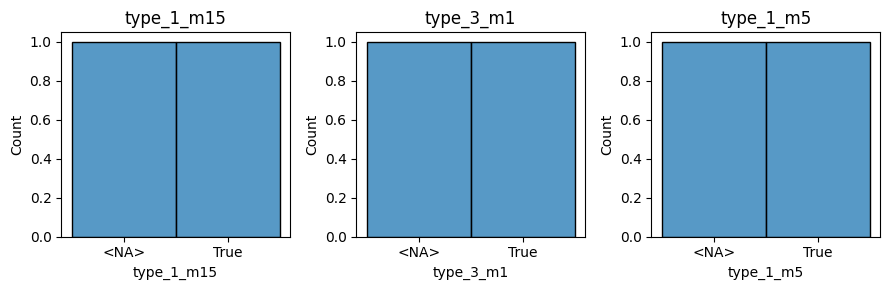

In [21]:
import seaborn as sns

plot_feature_distributions(df, type_X_cols,)

